# PitViper Notebook Report

Ce notebook a été généré automatiquement par l'outil PitViper.

Il peut être utilisé de deux manières :

1. En utilisant les fonctions déjà crées et présentes dans les cellules suivantes.

2. En créant de nouvelles cellules et en y écrivant du code python3.

Les graphiques sont générés à l'aide de la bibliothèque python [Altair](https://altair-viz.github.io/index.html). Il est possible de télécharger chaque graphique au format SVG depuis le menu déroulant présent en haut à droite de chaque graphique.

La cellule suivante permet d'appeler les fonctions déjà crées pour la visualisation des résultats.

In [1]:
import sys
import os


modules_path = ['workflow/notebooks/', "../../../workflow/notebooks/"]
for module in modules_path:
    module_path = os.path.abspath(os.path.join(module))
    if module_path not in sys.path:
        sys.path.append(module_path)


from functions_pitviper_nb import * 

import time

alt.renderers.enable('html')

# For Snakemake
switch = True
while os.path.basename(os.getcwd()) != "PitViper":
    if switch:
        switch = False
        %cd ../../
    else:
        %cd ../

print('Working directory: ', os.getcwd())

/mnt/d/Pipelines/PitViper/PitViper
Working directory:  /mnt/d/Pipelines/PitViper/PitViper


Lors de la création automatique du rapport, les deux cellule suivante sont utilisées pour définir les dossiers contenant les résultats des différents outils utilisés.

Il est recommandé de ne pas les modifier.

In [2]:
# Parameters
mageck_mle_outputs = "/mnt/d/pitviper_results/CRISPRi/MAGeCK_MLE/"
mageck_rra_outputs = "/mnt/d/pitviper_results/CRISPRi/MAGeCK_RRA/"
# bagel_outputs = "/mnt/d/pitviper_results/CRISPRi_M-07e/MAGeCK_MLE/"
crisphiermix_outputs = "/mnt/d/pitviper_results/CRISPRi/CRISPhieRmix/"

path_qc = "/mnt/d/pitviper_results/CRISPRi/screen.count_normalized.txt"

In [3]:
results_paths = [mageck_mle_outputs, mageck_rra_outputs, crisphiermix_outputs]

def configuration(results_paths):
    
    results_path_to_use = []
    for path in results_paths:
        if os.path.exists(path):
            results_path_to_use.append(path)
    return results_path_to_use

results = create_results_pitviper(configuration(results_paths))

## Quality Control

In [4]:
# show_mapping_qc("/mnt/d/pitviper_results/tets/screen.countsummary.txt")

In [4]:
show_read_count_distribution(path_qc, width=500, height=250)

alt.Chart(...)

In [5]:
gene_selection_table(results)

interactive(children=(Dropdown(description='tool', options=('MAGeCK_MLE', 'MAGeCK_RRA', 'CRISPhieRmix'), value…

In [6]:
test_plotting(results['MAGeCK_MLE'], width=500, height=250)

interactive(children=(Dropdown(description='baseline', options=('M07e-J0', 'M07e-J7', 'M07e-J14'), value='M07e…

La fonction `sgRNA_accross_conditions` permet de visualiser l'évolution du score des sgRNAs prédit par l'outil MAGeCK d'une *feature* d'intérêt dans une condition donnée.

In [7]:
sgRNA_accross_conditions(results['MAGeCK_RRA'], width=500, height=250)

interactive(children=(Text(value='', description='Feature:', placeholder='Feature to show...'), Dropdown(descr…

## Gene essentiality analysis

Les fonctions suivantes permettent de visualiser l'évolution du score des `features` pour chaque outil.

### MAGeCK MLE - Feature accross conditions

In [8]:
feature_accros_conditions(results['MAGeCK_MLE'])

interactive(children=(Dropdown(description='baseline', options=('M07e-J0', 'M07e-J7', 'M07e-J14'), value='M07e…

### MAGeCK RRA - Feature accross conditions

In [10]:
feature_accros_conditions(results['MAGeCK_RRA'])

interactive(children=(Dropdown(description='baseline', options=('M07e-J7', 'M07e-J0', 'M07e-J14'), value='M07e…

### CRISPhieRmix - Feature accross conditions

In [11]:
feature_accros_conditions(results['CRISPhieRmix'])

interactive(children=(Dropdown(description='baseline', options=('M07e-J7', 'M07e-J0', 'M07e-J14'), value='M07e…

### BAGEL - Feature accross conditions

In [12]:
# feature_accros_conditions(results['BAGEL'])

## Annotations

### EnrichR

In [13]:
enrichr_plots(results)

interactive(children=(Dropdown(description='tool', options=('MAGeCK_MLE', 'MAGeCK_RRA', 'CRISPhieRmix'), value…

In [14]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import matplotlib as figure

def pca(token):
    path_qc = "./data/{token}/screen.count.txt".format(token=token)
    table = pd.read_csv(path_qc, sep='\t')
        
    table.iloc[:, 2:] = table.iloc[:, 2:] +1 
    table.iloc[:, 2:] = table.iloc[:, 2:].apply(np.log2)

    features = list(table.columns[2:])
    
    x = table.loc[:, features].values
    
    x = StandardScaler().fit_transform(x)
    
    pca = PCA(n_components=2)

    principalComponents = pca.fit_transform(x)

    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
    
#     fig = plt.figure.Figure(figsize = (8,8))
#     ax = fig.add_subplot(1,1,1)
#     fig = ax.scatter(principalDf)

    return principalDf

    
# pca('CRISPRi_countFrom_bam')

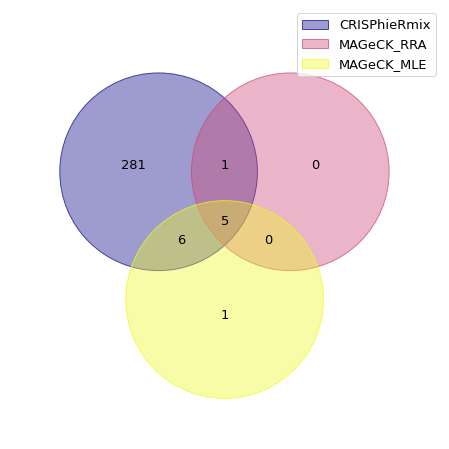

In [15]:
from venn import venn


baseline = "M07e-J0"
treatment = "M07e-J21"

condition = treatment + "_vs_" + baseline
fdr_col = treatment + "|fdr"

fdr_cutoff = 0.05


### MAGeCK MLE
mle_table = results['MAGeCK_MLE'].comparisons_dict[condition]['table'].copy()

mle_table.loc[mle_table[fdr_col] < fdr_cutoff, 'essential'] = True
mle_table.loc[mle_table[fdr_col] >= fdr_cutoff, 'essential'] = False
mle_table['tool'] = 'MAGeCK_MLE'

mle_table = mle_table[["Gene", "essential", "tool"]]

mle_table.head()


### MAGeCK RRA
rra_table = results['MAGeCK_RRA'].comparisons_dict[condition]['table'].copy()

rra_table

rra_table.loc[rra_table["neg|fdr"] < fdr_cutoff, 'essential'] = True
rra_table.loc[rra_table["neg|fdr"] >= fdr_cutoff, 'essential'] = False
rra_table['tool'] = 'MAGeCK_RRA'

rra_table = rra_table[["id", "essential", "tool"]]

rra_table.rename(columns={'id':'Gene'}, inplace=True)

rra_table.head()


### BAGEL
# bagel_table = results['BAGEL'].comparisons_dict[condition]['table'].copy()

# bagel_table.loc[bagel_table["BF"] > 0, 'essential'] = True
# bagel_table.loc[bagel_table["BF"] < 0, 'essential'] = False
# bagel_table['tool'] = 'BAGEL'

# bagel_table = bagel_table[["GENE", "essential", "tool"]]

# bagel_table.rename(columns={'GENE':'Gene'}, inplace=True)

# bagel_table.head()


### CRISPhieRmix
crm_table = results['CRISPhieRmix'].comparisons_dict[condition]['table'].copy()

crm_table.loc[crm_table["locfdr"] < 0.05, 'essential'] = True
crm_table.loc[crm_table["locfdr"] >= 0.05, 'essential'] = False
crm_table['tool'] = 'CRISPhieRmix'

crm_table = crm_table[["gene", "essential", "tool"]]

crm_table.rename(columns={'gene':'Gene'}, inplace=True)

crm_table.head()


### Intégration

integration =  pd.concat([mle_table, rra_table, crm_table])

integration.head()

# print('\n > Genes by tool:')
# print(integration['tool'].value_counts())

# print('\n >MAGeCK MLE essentials genes:')
# print(integration.loc[integration['tool'] == 'MAGeCK_MLE']['essential'].value_counts())

# print('\n >MAGeCK RRA essentials genes:')
# print(integration.loc[integration['tool'] == 'MAGeCK_RRA']['essential'].value_counts())

# print('\n >BAGEL essentials genes:')
# print(integration.loc[integration['tool'] == 'BAGEL']['essential'].value_counts())

# print('\n >CRISPhieRmix essentials genes:')
# print(integration.loc[integration['tool'] == 'CRISPhieRmix']['essential'].value_counts())

integration_pivot = integration.pivot(index = "Gene", columns = 'tool', values = 'essential').reset_index()
# integration_pivot.drop("tool",axis=1,inplace=True)

def select_genes(integration, mode = "all", tools=["CRISPhieRmix", "MAGeCK_MLE", "MAGeCK_RRA"]):
    if mode == "all":
        integration['test'] = integration[tools].all(axis='columns')
    if mode == "any":
        integration['test'] = integration[tools].any(axis='columns')
    return integration.loc[integration['test'] == True]['Gene'].values
    
    
cpm_genes = select_genes(integration_pivot, tools = ['CRISPhieRmix'])
# bagel_genes = select_genes(integration_pivot, tools = ['BAGEL'])
rra_genes = select_genes(integration_pivot, tools = ['MAGeCK_RRA'])
mle_genes = select_genes(integration_pivot, tools = ['MAGeCK_MLE'])

d = {'CRISPhieRmix': set(cpm_genes),
#      'BAGEL': set(bagel_genes),
     'MAGeCK_RRA': set(rra_genes),
     'MAGeCK_MLE': set(mle_genes)}

venn(d, cmap="plasma")

all_genes = select_genes(integration_pivot, mode = "any")

# print(len(all_genes))
# for gene in all_genes:
#     print(gene)


 > Genes by tool:
CRISPhieRmix    452
MAGeCK_RRA      452
MAGeCK_MLE      452
Name: tool, dtype: int64

 >MAGeCK MLE essentials genes:
False    409
True      43
Name: essential, dtype: int64

 >MAGeCK RRA essentials genes:
False    422
True      30
Name: essential, dtype: int64

 >BAGEL essentials genes:
Series([], Name: essential, dtype: int64)

 >CRISPhieRmix essentials genes:
True     293
False    159
Name: essential, dtype: int64


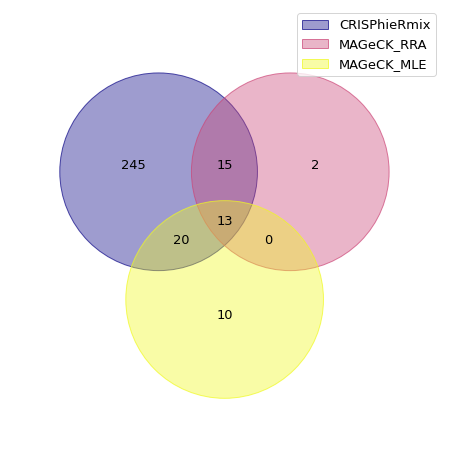

In [16]:
from venn import venn


baseline = "M07e-J0"
treatment = "M07e-J21"

condition = treatment + "_vs_" + baseline
fdr_col = treatment + "|p-value"

fdr_cutoff = 0.05


### MAGeCK MLE
mle_table = results['MAGeCK_MLE'].comparisons_dict[condition]['table'].copy()

mle_table.loc[mle_table[fdr_col] < fdr_cutoff, 'essential'] = True
mle_table.loc[mle_table[fdr_col] >= fdr_cutoff, 'essential'] = False
mle_table['tool'] = 'MAGeCK_MLE'

mle_table = mle_table[["Gene", "essential", "tool"]]

mle_table.head()


### MAGeCK RRA
rra_table = results['MAGeCK_RRA'].comparisons_dict[condition]['table'].copy()

rra_table

rra_table.loc[rra_table["neg|p-value"] < fdr_cutoff, 'essential'] = True
rra_table.loc[rra_table["neg|p-value"] >= fdr_cutoff, 'essential'] = False
rra_table['tool'] = 'MAGeCK_RRA'

rra_table = rra_table[["id", "essential", "tool"]]

rra_table.rename(columns={'id':'Gene'}, inplace=True)

rra_table.head()


### MAGeCK RRA
# bagel_table = results['BAGEL'].comparisons_dict[condition]['table'].copy()

# bagel_table.loc[bagel_table["BF"] > 0, 'essential'] = True
# bagel_table.loc[bagel_table["BF"] < 0, 'essential'] = False
# bagel_table['tool'] = 'BAGEL'

# bagel_table = bagel_table[["GENE", "essential", "tool"]]

# bagel_table.rename(columns={'GENE':'Gene'}, inplace=True)

# bagel_table.head()


### CRISPhieRmix
crm_table = results['CRISPhieRmix'].comparisons_dict[condition]['table'].copy()

crm_table.loc[crm_table["locfdr"] < 0.05, 'essential'] = True
crm_table.loc[crm_table["locfdr"] >= 0.05, 'essential'] = False
crm_table['tool'] = 'CRISPhieRmix'

crm_table = crm_table[["gene", "essential", "tool"]]

crm_table.rename(columns={'gene':'Gene'}, inplace=True)

crm_table.head()


### Intégration

integration =  pd.concat([mle_table, rra_table, crm_table])

integration.head()

print('\n > Genes by tool:')
print(integration['tool'].value_counts())

print('\n >MAGeCK MLE essentials genes:')
print(integration.loc[integration['tool'] == 'MAGeCK_MLE']['essential'].value_counts())

print('\n >MAGeCK RRA essentials genes:')
print(integration.loc[integration['tool'] == 'MAGeCK_RRA']['essential'].value_counts())

print('\n >BAGEL essentials genes:')
print(integration.loc[integration['tool'] == 'BAGEL']['essential'].value_counts())

print('\n >CRISPhieRmix essentials genes:')
print(integration.loc[integration['tool'] == 'CRISPhieRmix']['essential'].value_counts())

integration_pivot = integration.pivot(index = "Gene", columns = 'tool', values = 'essential').reset_index()
# integration_pivot.drop("tool",axis=1,inplace=True)

def select_genes(integration, mode = "all", tools=["CRISPhieRmix", "MAGeCK_MLE", "MAGeCK_RRA"]):
    if mode == "all":
        integration['test'] = integration[tools].all(axis='columns')
    if mode == "any":
        integration['test'] = integration[tools].any(axis='columns')
    return integration.loc[integration['test'] == True]['Gene'].values
    
    
cpm_genes = select_genes(integration_pivot, tools = ['CRISPhieRmix'])
rra_genes = select_genes(integration_pivot, tools = ['MAGeCK_RRA'])
mle_genes = select_genes(integration_pivot, tools = ['MAGeCK_MLE'])

d = {'CRISPhieRmix': set(cpm_genes),
     'MAGeCK_RRA': set(rra_genes),
     'MAGeCK_MLE': set(mle_genes)}

venn(d, cmap="plasma")

all_genes = select_genes(integration_pivot, mode = "any")

# print(len(all_genes))
# for gene in all_genes:
#     print(gene)

In [17]:

print('Baseline:', baseline)
print('Treatment:', treatment)
comp = treatment + '_vs_' + baseline

data = results['MAGeCK_MLE']
cris_data = results['CRISPhieRmix'].comparisons_dict[comp]['table'] 
CRISP_SE = cris_data.loc[cris_data['locfdr'] < 0.05]['gene'].values

source = data.comparisons_dict[comp]['table']

source['default_rank'] = source[treatment + '|z'].rank()
source.loc[source['Gene'].isin(CRISP_SE), 'CRISPhieRmix'] = 'Yes'
source.loc[~source['Gene'].isin(CRISP_SE), 'CRISPhieRmix'] = 'No'

domain = ['Yes', 'No']
range_ = ["red", "grey"]

chart = alt.Chart(source).mark_circle(size=60).encode(
    x=alt.X('default_rank:Q', axis=alt.Axis(title='Rank')),
    y=alt.Y(treatment + '|z:Q'),
    tooltip=['Gene', 'sgRNA', treatment + '|z', treatment + '|fdr', 'CRISPhieRmix'],
    color=alt.Color('CRISPhieRmix', scale=alt.Scale(domain=domain, range=range_), legend=alt.Legend(title="Significativity:"))
).properties(width=500, height=250).interactive()

line = alt.Chart(pd.DataFrame({'y': [0]})).mark_rule().encode(y='y')

chart = (chart + line)

chart

Baseline: M07e-J0
Treatment: M07e-J21


alt.LayerChart(...)

In [18]:
print(len(cris_data.loc[cris_data['locfdr'] < 0.05]['gene'].values))
print(len(cris_data.loc[cris_data['FDR'] < 0.05]['gene'].values))
print(len(cris_data.loc[cris_data['score'] == 1]['gene'].values))

293
346
157


In [119]:
directory = "/mnt/d/pitviper_results/CRISPRi/CRISPhieRmix/"

tables = []
for dir in os.listdir(directory):
    if "J0" in dir:
        treatment, control = dir.split("_vs_")
    #     print(treatment, control)
        deseq2_file = directory + dir + "/" + dir + "_DESeq2_results.txt"
        content = pd.read_csv(deseq2_file)
        content['Condition'] = dir
    #     print(content)
        tables.append(content)
    
table = pd.concat(tables)
table['sgRNA'] = table.groupby(['Gene','Condition']).cumcount()+1; table

erg_table = table.loc[table['Gene'] == "ERG"]
print(erg_table.head(n=5))
# print(set(erg_table['Condition'].values))

source = erg_table

step = 40
overlap = 1

alt.Chart(source).mark_boxplot().encode(
    x='log2FoldChange:Q',
    y='Condition:O'
)

  Gene     baseMean  log2FoldChange     lfcSE      stat    pvalue      padj  \
0  ERG   925.555523        0.220600  0.149952  1.471133  0.141255  0.999235   
1  ERG   193.339773       -0.380576  0.257055 -1.480521  0.138734  0.999235   
2  ERG   782.621656       -0.078849  0.170319 -0.462947  0.643403  0.999235   
3  ERG   380.129600       -0.439999  0.293821 -1.497509  0.134261  0.999235   
4  ERG  1454.601058        0.088118  0.132972  0.662680  0.507535  0.999235   

             Condition  sgRNA  
0  M07e-J14_vs_M07e-J0      1  
1  M07e-J14_vs_M07e-J0      2  
2  M07e-J14_vs_M07e-J0      3  
3  M07e-J14_vs_M07e-J0      4  
4  M07e-J14_vs_M07e-J0      5  


alt.Chart(...)

In [102]:
source = pd.DataFrame({
    'Trial A': np.random.normal(0, 0.8, 1000),
    'Trial B': np.random.normal(-2, 1, 1000),
    'Trial C': np.random.normal(3, 2, 1000)
})
source

,Trial A,Trial B,Trial C
0,-0.332050,-2.510405,2.945509
1,-1.508728,-2.104926,-1.773950
2,-0.482986,-1.555982,3.329166
3,0.964121,-3.840875,4.211128
4,-0.194643,-2.880611,1.740409
...,...,...,...
995,0.137925,-2.622652,1.142576
996,0.959870,-1.221380,3.989730
997,-1.776698,-1.351878,4.486011
998,1.398478,-1.289251,3.079509
